# Statistical Analysis Time Series

## What is Time Series?

**Time Series** is a series of data points indexed or listed in time order.

## Time Series with Pandas

During this course we will mostly deal with pandas datetime and pandas datetime index.  

For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

### Pandas timeseries index

In [1]:
import pandas as pd

generate datetime index

In [2]:
idx = pd.date_range(
    start='2020-01-01', # start date, can be in string or datetime-like format
#     end=, # end date of desired range, uncomment to use it
    periods=7, # number of period to generate
    freq='D'
)
print(idx)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')


We can refer to the following table for offset aliases.

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

### Converting to pandas datetime

In [3]:
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [4]:
pd.isnull(idx)

array([False, False, False,  True])

Notice missing dates in pandas datetime is `NaT` format not `NaN`, `pd.isnull()` still can indentified missing values in datetime format

In [5]:
# Create a NumPy datetime array
some_dates = np.array(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[D]')
some_dates

array(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[D]')

In [6]:
# Convert to an datetime index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [7]:
# Assign freq
idx.freq = 'D'
idx

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

### Resampling Time Series

#### Downsampling

In [8]:
import pandas as pd
%matplotlib inline

In [9]:
df = pd.read_csv('../dataset/starbucks-stock.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.set_index('Date', inplace=True)

In [10]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

In [11]:
df.tail()

Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183

In [12]:
df.resample('M').last().head()

Close    Volume
Date                         
2015-01-31  40.8482  10070456
2015-02-28  43.7865   8658404
2015-03-31  44.3556   8717754
2015-04-30  46.4446   8492048
2015-05-31  48.8289   9399112

In [13]:
df.resample('M', label='right').mean().head()

Close        Volume
Date                               
2015-01-31  38.729470  1.336800e+07
2015-02-28  42.862432  7.908719e+06
2015-03-31  44.321836  8.905969e+06
2015-04-30  45.508914  8.540996e+06
2015-05-31  47.488650  6.723716e+06

#### Upsampling

In [14]:
df.asfreq(freq='D')

Close      Volume
Date                           
2015-01-02  38.0061   6906098.0
2015-01-03      NaN         NaN
2015-01-04      NaN         NaN
2015-01-05  37.2781  11623796.0
2015-01-06  36.9748   7664340.0
...             ...         ...
2018-12-27  63.2000  11308081.0
2018-12-28  63.3900   7712127.0
2018-12-29      NaN         NaN
2018-12-30      NaN         NaN
2018-12-31  64.4000   7690183.0

[1460 rows x 2 columns]

### Shifting Time Series

In [15]:
# shift forward
df.shift(1).head()

Close      Volume
Date                           
2015-01-02      NaN         NaN
2015-01-05  38.0061   6906098.0
2015-01-06  37.2781  11623796.0
2015-01-07  36.9748   7664340.0
2015-01-08  37.8848   9732554.0

In [16]:
# shift backward
df.shift(-1).tail()

Close      Volume
Date                         
2018-12-24  63.08  16646238.0
2018-12-26  63.20  11308081.0
2018-12-27  63.39   7712127.0
2018-12-28  64.40   7690183.0
2018-12-31    NaN         NaN

In [17]:
# shift based on frequency
df.shift(periods=1, freq='M').head()

Close    Volume
Date                         
2015-01-31  38.0061   6906098
2015-01-31  37.2781  11623796
2015-01-31  36.9748   7664340
2015-01-31  37.8848   9732554
2015-01-31  38.4961  13170548

### Rolling

In [18]:
df['sma20'] = df['Close'].rolling(window=20).mean()
df['sma200'] = df['Close'].rolling(window=200).mean()

## Visualizing Time Series

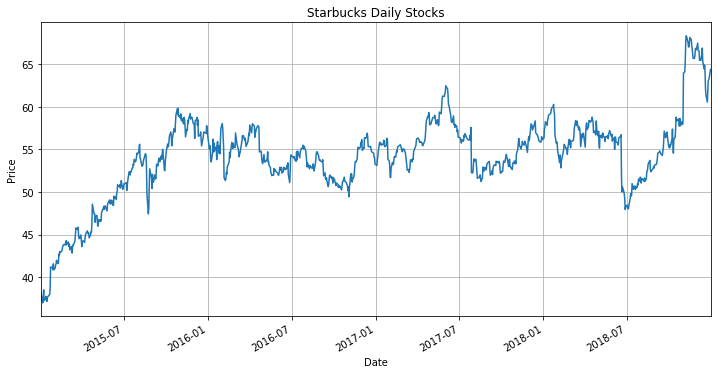

In [19]:
# visualizing with pandas
ax = df['Close'].plot(figsize=(12, 6), 
                 grid=True, 
                 title='Starbucks Daily Stocks')
ax.set_ylabel('Price');

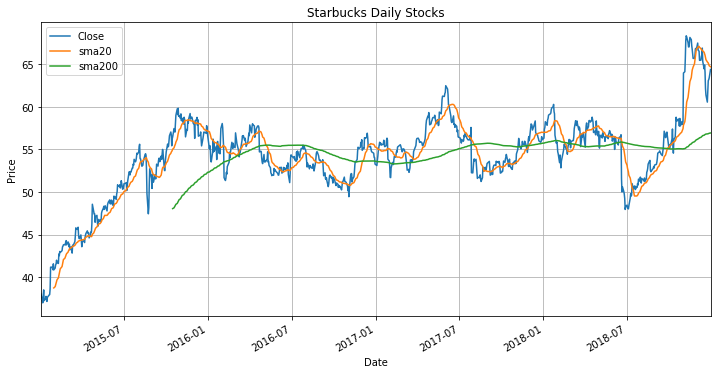

In [20]:
# plot time series on top of each other
# visualizing with pandas
ax = df[['Close', 'sma20', 'sma200']].plot(figsize=(12, 6), 
                 grid=True, 
                 title='Starbucks Daily Stocks')


ax.set_ylabel('Price');

In [21]:
# add candle stick, bollinger bond, simple moving average

## Component of Time Series

## Missing Values in Time Series

In [22]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [23]:
df = df.asfreq(freq='D')
df

Close      Volume    sma20     sma200
Date                                               
2015-01-02  38.0061   6906098.0      NaN        NaN
2015-01-03      NaN         NaN      NaN        NaN
2015-01-04      NaN         NaN      NaN        NaN
2015-01-05  37.2781  11623796.0      NaN        NaN
2015-01-06  36.9748   7664340.0      NaN        NaN
...             ...         ...      ...        ...
2018-12-27  63.2000  11308081.0  65.0105  56.874353
2018-12-28  63.3900   7712127.0  64.8390  56.902258
2018-12-29      NaN         NaN      NaN        NaN
2018-12-30      NaN         NaN      NaN        NaN
2018-12-31  64.4000   7690183.0  64.7150  56.932560

[1460 rows x 4 columns]

### forward filling

propagate last valid observation forward to next valid.  

see : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [24]:
df.fillna(method='ffill')

Close      Volume    sma20     sma200
Date                                               
2015-01-02  38.0061   6906098.0      NaN        NaN
2015-01-03  38.0061   6906098.0      NaN        NaN
2015-01-04  38.0061   6906098.0      NaN        NaN
2015-01-05  37.2781  11623796.0      NaN        NaN
2015-01-06  36.9748   7664340.0      NaN        NaN
...             ...         ...      ...        ...
2018-12-27  63.2000  11308081.0  65.0105  56.874353
2018-12-28  63.3900   7712127.0  64.8390  56.902258
2018-12-29  63.3900   7712127.0  64.8390  56.902258
2018-12-30  63.3900   7712127.0  64.8390  56.902258
2018-12-31  64.4000   7690183.0  64.7150  56.932560

[1460 rows x 4 columns]

### Backward filling

use NEXT valid observation to fill. 

see : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [25]:
df.fillna(method='bfill')

Close      Volume     sma20     sma200
Date                                                
2015-01-02  38.0061   6906098.0  38.72947  48.047739
2015-01-03  37.2781  11623796.0  38.72947  48.047739
2015-01-04  37.2781  11623796.0  38.72947  48.047739
2015-01-05  37.2781  11623796.0  38.72947  48.047739
2015-01-06  36.9748   7664340.0  38.72947  48.047739
...             ...         ...       ...        ...
2018-12-27  63.2000  11308081.0  65.01050  56.874353
2018-12-28  63.3900   7712127.0  64.83900  56.902258
2018-12-29  64.4000   7690183.0  64.71500  56.932560
2018-12-30  64.4000   7690183.0  64.71500  56.932560
2018-12-31  64.4000   7690183.0  64.71500  56.932560

[1460 rows x 4 columns]

### Interpolate

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate

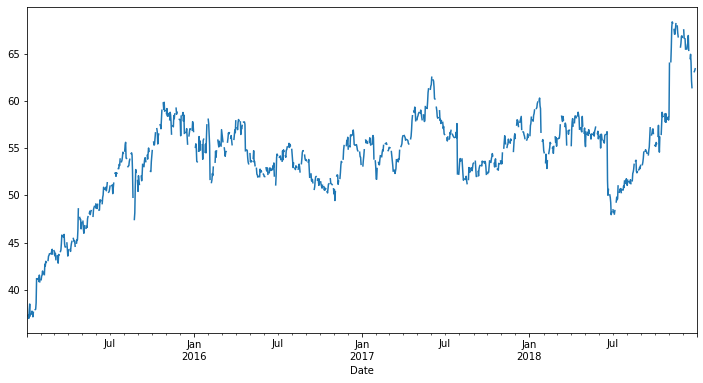

In [26]:
df.Close.plot(figsize=(12, 6));

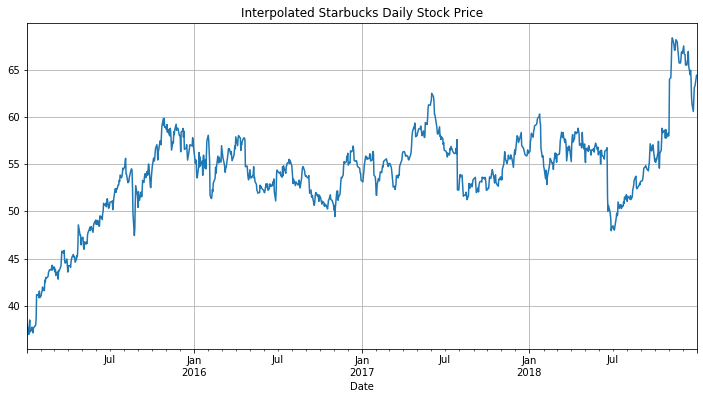

In [27]:
df.Close.interpolate(method='time', 
                     limit_direction='forward', 
                     limit_area='inside')\
        .plot(figsize=(12, 6), 
              grid=True,
              title='Interpolated Starbucks Daily Stock Price');

### Question 

Imagine that we are working on stock price data, then we want to predict/forecast the return/price of the stocks but, **we have missing value on the data**. Assume it is caused because of non-working day of security market.  

How do you treat this missing data? why?

### Decomposing Time Series

In [28]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL, seasonal_decompose

register_matplotlib_converters()
sns.set_style('darkgrid')

In [29]:
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [30]:
co2 = pd.read_csv('../dataset/co2.csv', header=None, index_col=0, parse_dates=True)
co2.columns = ['value']
co2.index.name = 'date'
co2.index.freq = 'M'
co2.head()

value
date              
1959-01-31  315.58
1959-02-28  316.39
1959-03-31  316.79
1959-04-30  317.82
1959-05-31  318.39

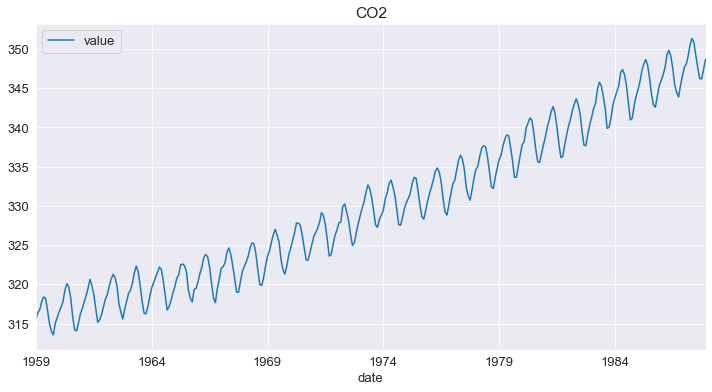

In [31]:
# Plot original series
co2.plot(title='CO2', figsize=(12, 6));

In [32]:
decompose = seasonal_decompose(co2, model='additive')

In [33]:
# trend
decompose.trend[decompose.trend.notnull()]

date
1959-07-31    316.140833
1959-08-31    316.209583
1959-09-30    316.280833
1959-10-31    316.380833
1959-11-30    316.509583
                 ...    
1987-02-28    347.777083
1987-03-31    347.936667
1987-04-30    348.104583
1987-05-31    348.290417
1987-06-30    348.468750
Freq: M, Name: trend, Length: 336, dtype: float64

In [34]:
decompose.seasonal

date
1959-01-31   -0.108146
1959-02-28    0.534131
1959-03-31    1.314622
1959-04-30    2.408149
1959-05-31    2.920247
                ...   
1987-08-31   -1.174813
1987-09-30   -2.912923
1987-10-31   -3.174024
1987-11-30   -2.027476
1987-12-31   -0.964634
Freq: M, Name: seasonal, Length: 348, dtype: float64

In [35]:
decompose.resid

date
1959-01-31   NaN
1959-02-28   NaN
1959-03-31   NaN
1959-04-30   NaN
1959-05-31   NaN
              ..
1987-08-31   NaN
1987-09-30   NaN
1987-10-31   NaN
1987-11-30   NaN
1987-12-31   NaN
Freq: M, Name: resid, Length: 348, dtype: float64

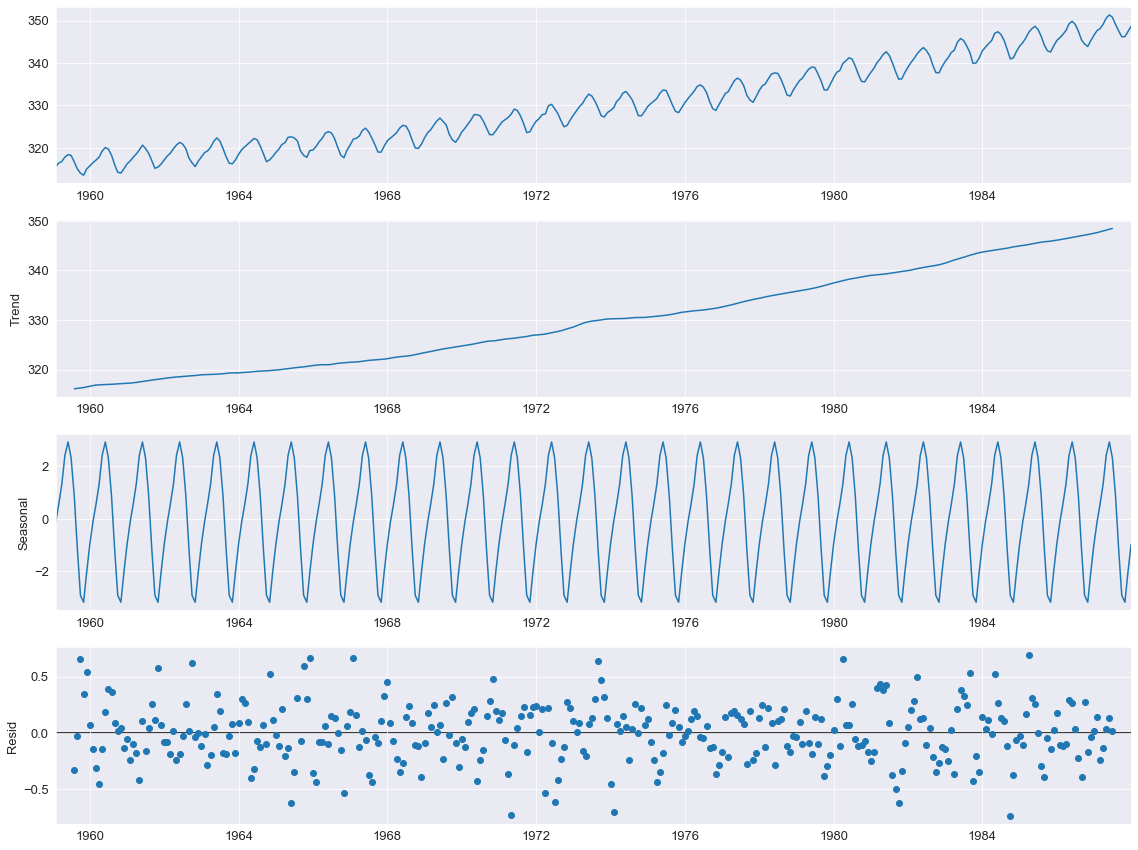

In [36]:
decompose.plot();

Noticed the beginning of the decomposition didn't begin at the beginning of observation. this is caused by decomposition using simple moving average in calculations.

In [37]:
# STL decomposition
stl = STL(co2, period=12)

In [38]:
res = stl.fit()

In [39]:
res.trend

date
1959-01-31    315.601857
1959-02-28    315.689139
1959-03-31    315.777925
1959-04-30    315.867825
1959-05-31    315.958209
                 ...    
1987-08-31    348.809893
1987-09-30    348.985318
1987-10-31    349.161504
1987-11-30    349.338368
1987-12-31    349.515771
Freq: M, Name: trend, Length: 348, dtype: float64

In [40]:
res.seasonal

date
1959-01-31   -0.152349
1959-02-28    0.534671
1959-03-31    0.935271
1959-04-30    2.013448
1959-05-31    2.673963
                ...   
1987-08-31   -1.460591
1987-09-30   -2.621358
1987-10-31   -3.065046
1987-11-30   -1.898383
1987-12-31   -0.845662
Freq: M, Name: season, Length: 348, dtype: float64

In [41]:
res.resid

date
1959-01-31    0.130492
1959-02-28    0.166190
1959-03-31    0.076804
1959-04-30   -0.061273
1959-05-31   -0.242172
                ...   
1987-08-31    0.190699
1987-09-30   -0.163960
1987-10-31    0.103542
1987-11-30    0.000014
1987-12-31   -0.000109
Freq: M, Name: resid, Length: 348, dtype: float64

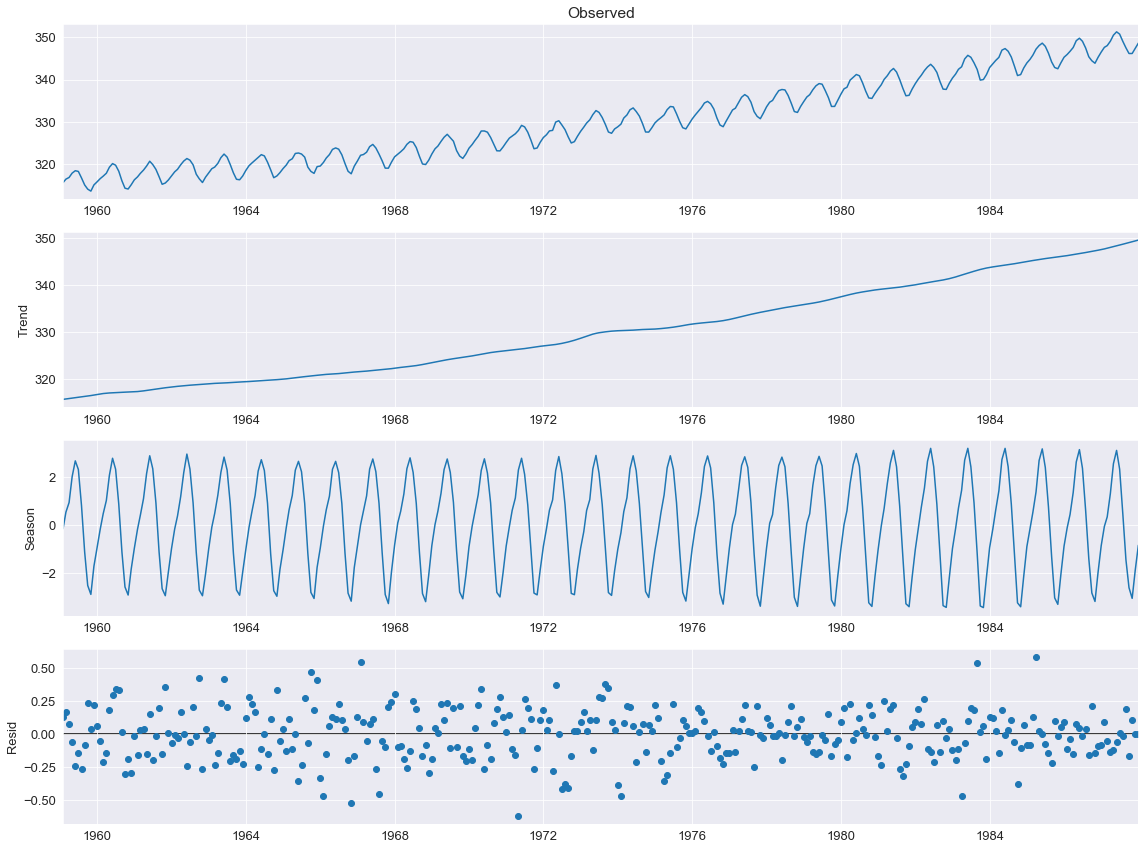

In [42]:
res.plot();

## Auto-Correlations

In [43]:
# this one is just to simulate process of time series optional to learn
from statsmodels.tsa.arima_process import ArmaProcess

ar = [1, -0.9]
ma = [1]
generator = ArmaProcess(ar=ar, ma=ma)
simulated_data = generator.generate_sample(nsample=100)

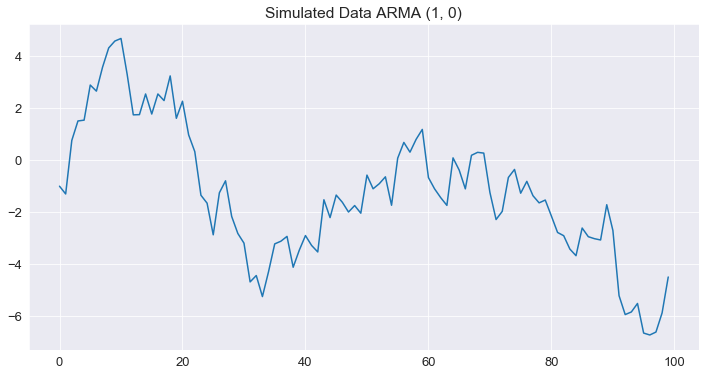

In [44]:
plt.rc('figure',figsize=(12,6))
plt.plot(simulated_data)
plt.title('Simulated Data ARMA (1, 0)');

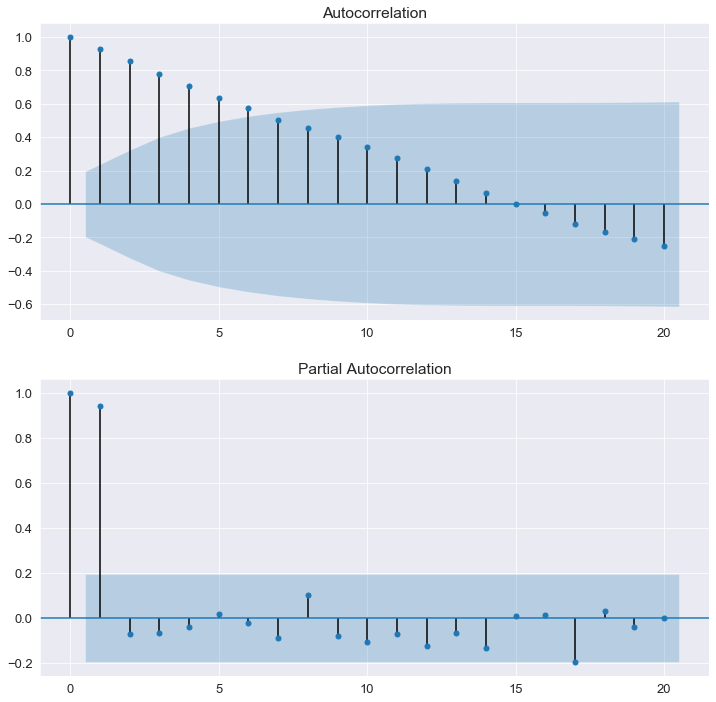

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(simulated_data, ax=axs[0])
plot_pacf(simulated_data, ax=axs[1]);

In [46]:
# this one is just to simulate process of time series optional to learn

ar = [1, 0.9]
ma = [1]
generator = ArmaProcess(ar=ar, ma=ma)
simulated_data = generator.generate_sample(nsample=100)

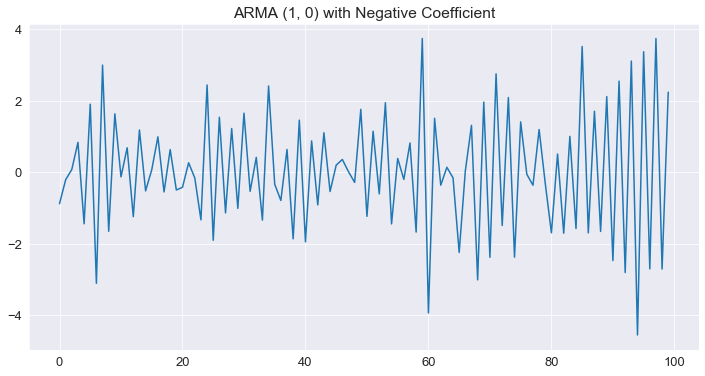

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(simulated_data)
ax.set_title('ARMA (1, 0) with Negative Coefficient');

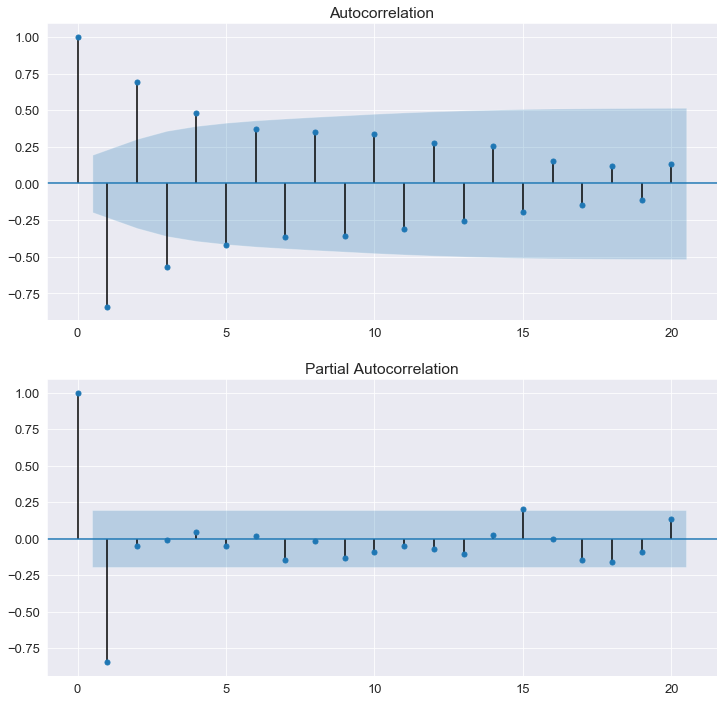

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(simulated_data, ax=axs[0])
plot_pacf(simulated_data, ax=axs[1]);

In [49]:
# this one is just to simulate process of time series optional to learn
ar = [1]
ma = [1, 0.9]

generator = ArmaProcess(ar=ar, ma=ma)
simulated_data = generator.generate_sample(nsample=100)

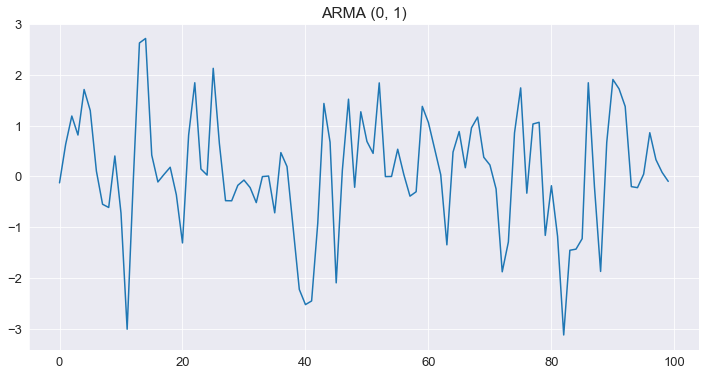

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(simulated_data)
ax.set_title('ARMA (0, 1)');

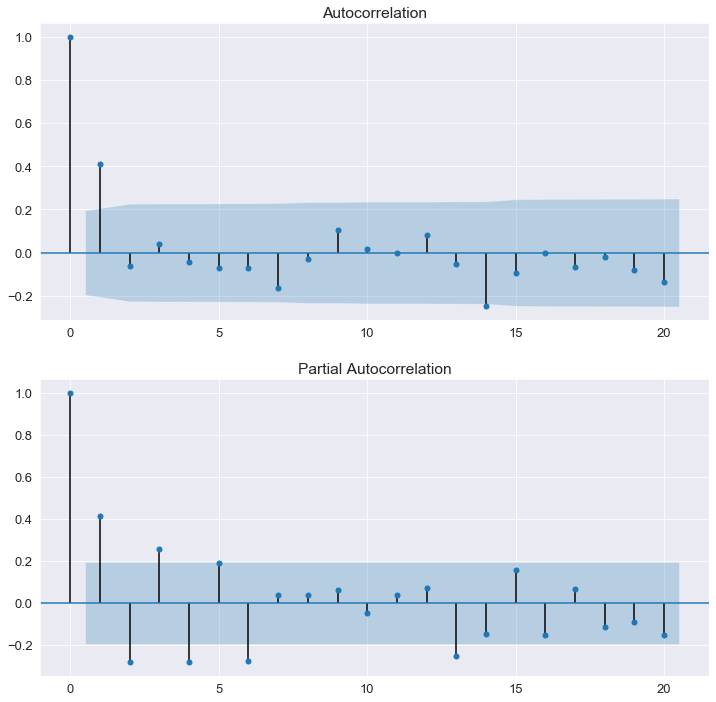

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(simulated_data, ax=axs[0])
plot_pacf(simulated_data, ax=axs[1]);

In [52]:
# this one is just to simulate process of time series optional to learn
ar = [1]
ma = [1, -0.9]

generator = ArmaProcess(ar=ar, ma=ma)
simulated_data = generator.generate_sample(nsample=100)

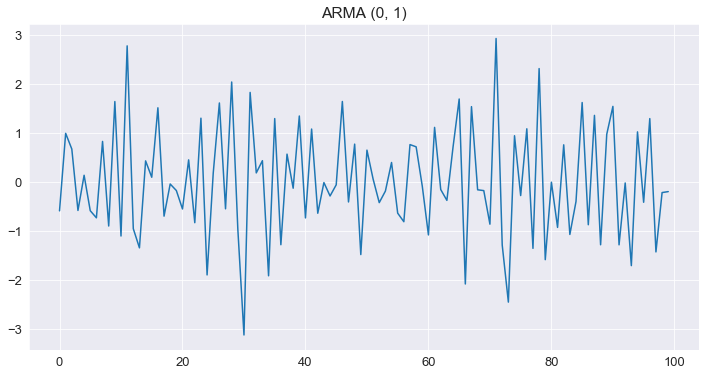

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(simulated_data)
ax.set_title('ARMA (0, 1)');

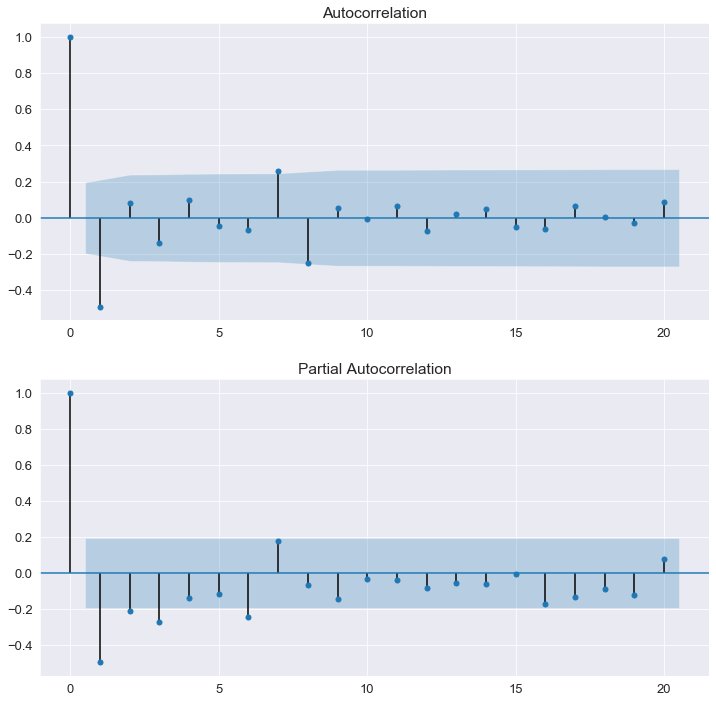

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(simulated_data, ax=axs[0])
plot_pacf(simulated_data, ax=axs[1]);

In [55]:
# this one is just to simulate process of time series optional to learn
ar = [1, -0.9]
ma = [1, 0.9]

generator = ArmaProcess(ar=ar, ma=ma)
simulated_data = generator.generate_sample(nsample=100)

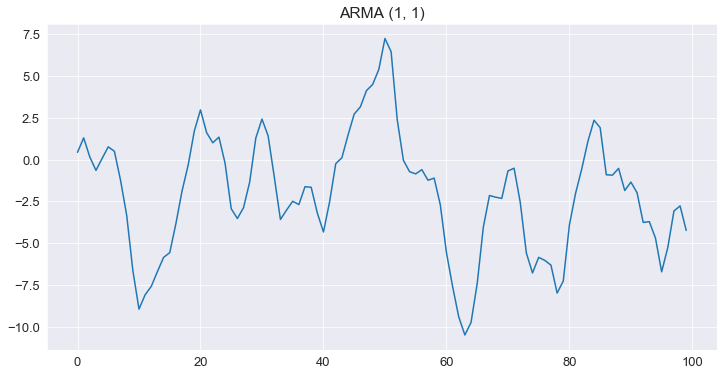

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(simulated_data)
ax.set_title('ARMA (1, 1)');

/Users/mamduh/opt/anaconda3/envs/ds/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


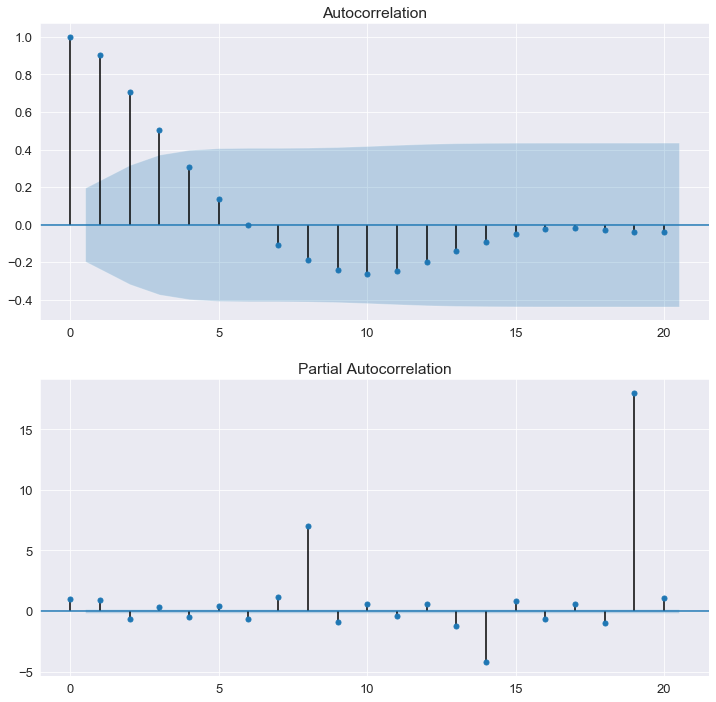

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(simulated_data, ax=axs[0])
plot_pacf(simulated_data, ax=axs[1]);

In [58]:
# this one is just to simulate process of time series optional to learn
ar = [1, 0.9]
ma = [1, 0.9]

generator = ArmaProcess(ar=ar, ma=ma)
simulated_data = generator.generate_sample(nsample=100)

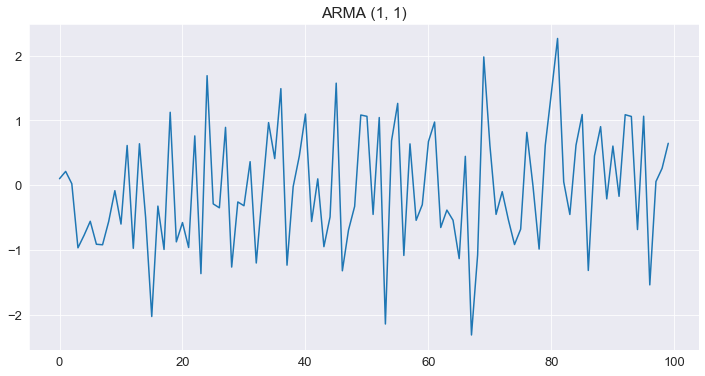

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(simulated_data)
ax.set_title('ARMA (1, 1)');

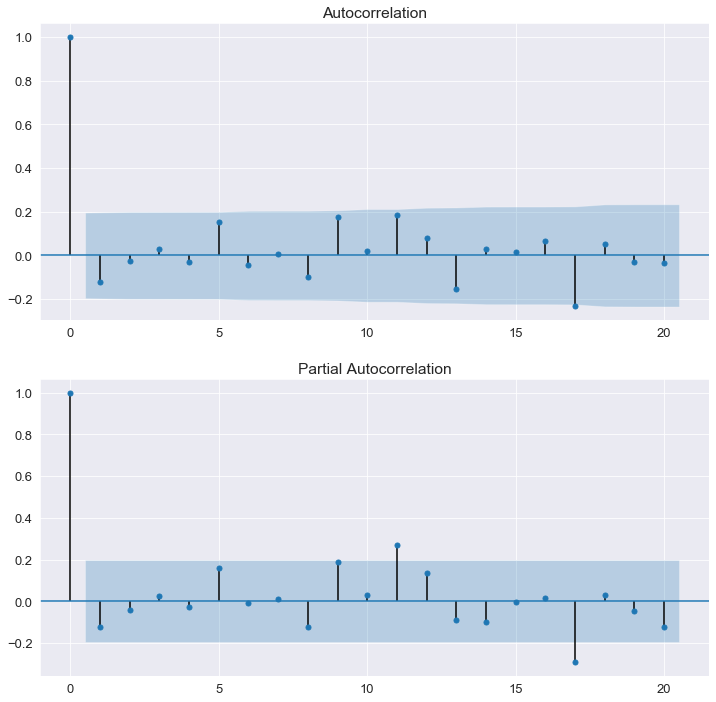

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(simulated_data, ax=axs[0])
plot_pacf(simulated_data, ax=axs[1]);